# Repetisjon fra forrige gang:

In [3]:
# Importing packages
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt

# Getting URL
url = "https://zenodo.org/record/6199560/files/default.csv"
# Reading dataset
data = pd.read_csv(url)

In [6]:
print(data)

      Unnamed: 0 default student      balance        income
0              1      No      No   729.526495  44361.625074
1              2      No     Yes   817.180407  12106.134700
2              3      No      No  1073.549164  31767.138947
3              4      No      No   529.250605  35704.493935
4              5      No      No   785.655883  38463.495879
...          ...     ...     ...          ...           ...
9995        9996      No      No   711.555020  52992.378914
9996        9997      No      No   757.962918  19660.721768
9997        9998      No      No   845.411989  58636.156984
9998        9999      No      No  1569.009053  36669.112365
9999       10000      No     Yes   200.922183  16862.952321

[10000 rows x 5 columns]


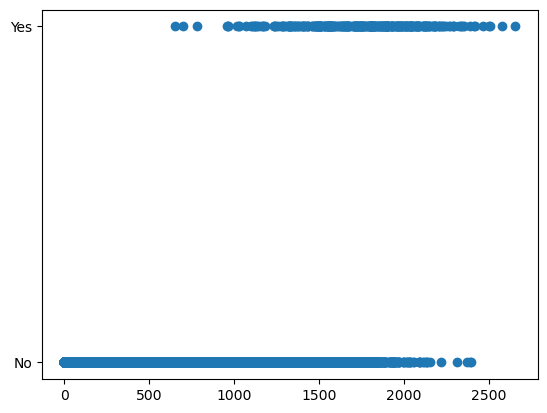

In [7]:
plt.scatter(data["balance"],data["default"])
plt.show()

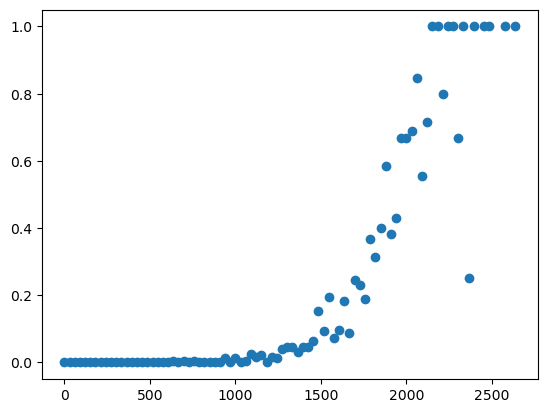

In [9]:
# Dividing into two sections
df_y = data[data["default"] == "Yes"]
df_n = data[data["default"] == "No"]

# Generating histograms
defaultBins = np.linspace(0,3000,100)
histY, binsY = np.histogram(df_y["balance"],bins = defaultBins)
histA, binsA = np.histogram(data["balance"],bins = defaultBins)

x = []
y = []
for i in range(len(defaultBins)-1):
    if histA[i] != 0:
        x.append(defaultBins[i])
        y.append(histY[i]/histA[i])

plt.scatter(x,y)
plt.show()

### Kult!

In [19]:
# Doing regression actually
import sklearn.linear_model as sk
r = sk.LogisticRegression()

# Importing some stuff (holy this is so stupid why haven't we learned this)
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
x_e = lab_enc.fit_transform(x)
y_e = lab_enc.fit_transform(y)

# Ok for real this time (doesn't even work correctly bro what the fuck)
r.fit(x_e.reshape(-1,1),y_e)


/usr/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:1201: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  check_classification_targets(y)
/usr/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

# Ok på tide med forelesning

In [37]:
url = "https://henriasv.github.io/hon2200-v26/lectures/data/hemmelig_funksjon.txt"
data = np.loadtxt(url)

In [39]:
# Getting collumns haha
x = data[:,0]
y = data[:,1]

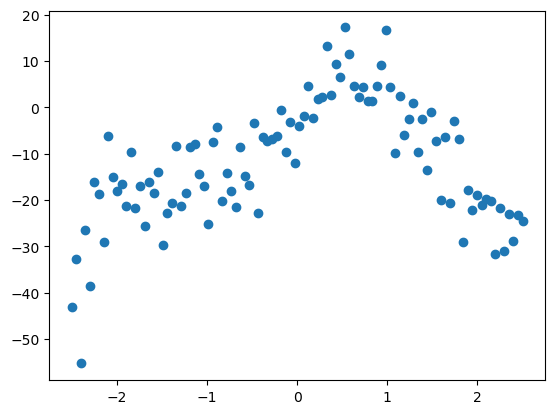

In [40]:
plt.scatter(x,y)

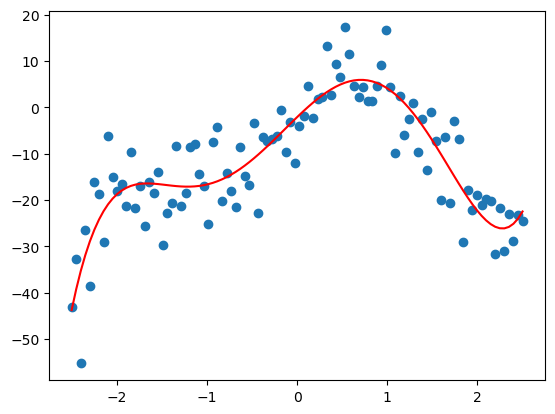

In [68]:
i = 5
betas = np.polyfit(x,y,i)

f = lambda x : np.polyval(betas,x)

X = np.linspace(-2.5,2.5,100)
Y = f(X)

plt.scatter(x,y)
plt.plot(X,Y,color ="red")
plt.show()

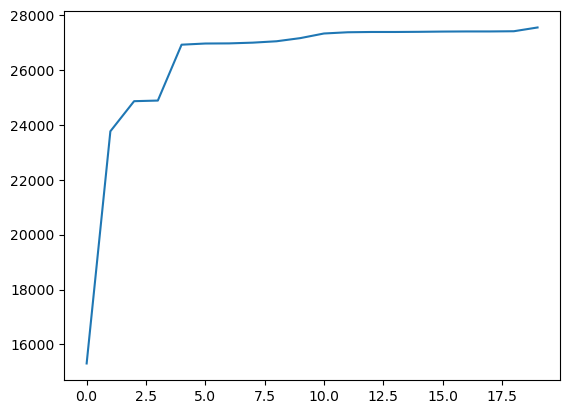

In [51]:
# Ok let's least squares this shit

squares = []
betas   = []

maxI = 20
for i in range(1,maxI+1):
    # Getting betas
    betas = np.polyfit(x,y,i)
    # Defining function
    f = lambda x : np.polyval(betas,x)

    # Getting squares (ok bruk MSE i stedet)
    currentSquares = sum(np.pow(f(x),2))
    squares.append(currentSquares)
    
plt.plot(range(len(squares)),squares)

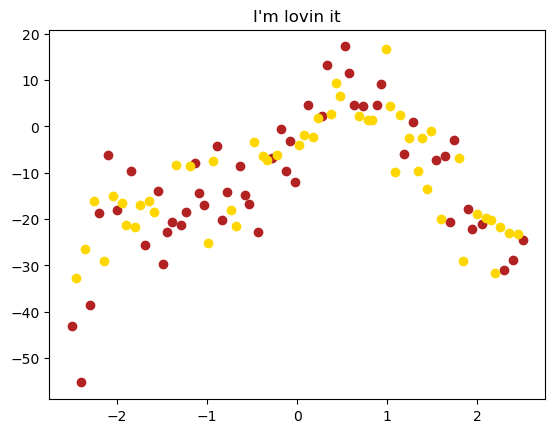

In [66]:
# Random permutations!!!
indices = np.random.permutation(len(x))
iT, iV  = np.array_split(indices,2)

# Splitting data into training and validation
xT = x[iT]
yT = y[iT]
xV = x[iV]
yV = y[iV]

# Plotting
plt.scatter(xT,yT,color = "firebrick")
plt.scatter(xV,yV,color = "gold")
plt.title("I'm lovin it")
plt.show()